# 附件一预处理（不包括异常值剔除及标准化）

In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_excel("Data\\First\\New\\201404071917.xlsx",sheet_name='201404071917')
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,7,19:17:47,425,-37,-8,30.0,10.75,DOWN,False,...,-1.37,-0.30,4.01,3.56,4.20,0.1250,机场117,机场68,0.1250,338560
1,4,7,19:17:48,423,-37,-8,30.0,10.75,DOWN,False,...,-0.09,-0.04,3.22,3.37,3.14,-0.0625,机场117,机场68,-0.0625,338560
2,4,7,19:17:49,422,-18,-9,30.0,10.75,DOWN,False,...,-0.04,0.62,3.95,3.70,4.02,-0.1250,机场117,机场68,-0.1250,338560
3,4,7,19:17:50,422,3,-9,30.0,10.75,DOWN,False,...,-0.37,-0.15,3.42,2.42,3.41,-0.0625,机场117,机场68,-0.0625,338560
4,4,7,19:17:51,423,8,-9,30.0,10.75,DOWN,False,...,-1.15,0.01,3.60,3.62,3.54,0.0625,机场117,机场68,0.0625,338560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33491,4,8,4:36: 8,106,-2,-8,30.0,0.50,DOWN,False,...,3.54,2.03,4.06,0.91,4.14,0.0000,机场117,机场68,0.0000,259680
33492,4,8,4:36: 9,106,-4,-8,30.0,0.50,DOWN,False,...,3.58,2.00,4.11,0.94,4.18,-0.0625,机场117,机场68,-0.0625,259680
33493,4,8,4:36:10,106,-4,-8,30.0,0.50,DOWN,False,...,3.45,2.20,4.10,0.98,4.18,0.0000,机场117,机场68,0.0000,259680
33494,4,8,4:36:11,106,-3,-8,30.0,0.50,DOWN,False,...,3.69,1.96,4.01,1.06,4.07,0.0000,机场117,机场68,0.0000,259680


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33496 entries, 0 to 33495
Data columns (total 64 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   月              33496 non-null  int64  
 1   日              33496 non-null  int64  
 2   具体时间           33496 non-null  object 
 3   海拔高度           33496 non-null  int64  
 4   下降率            33496 non-null  int64  
 5   无线电高度          33496 non-null  int64  
 6   计算空速           33496 non-null  float64
 7   地速             33496 non-null  float64
 8   起落架            1137 non-null   object 
 9   空地电门0.2秒       33496 non-null  bool   
 10  空地电门0.4秒       33496 non-null  bool   
 11  空地电门0.6秒       33496 non-null  bool   
 12  空地电门0.8秒       33496 non-null  bool   
 13  空地电门1秒         33496 non-null  bool   
 14  着陆G值0.1秒       33496 non-null  float64
 15  着陆G值0.2秒       33496 non-null  float64
 16  着陆G值0.3秒       33496 non-null  float64
 17  着陆G值0.4秒       33496 non-null  float64
 18  着陆G值0.

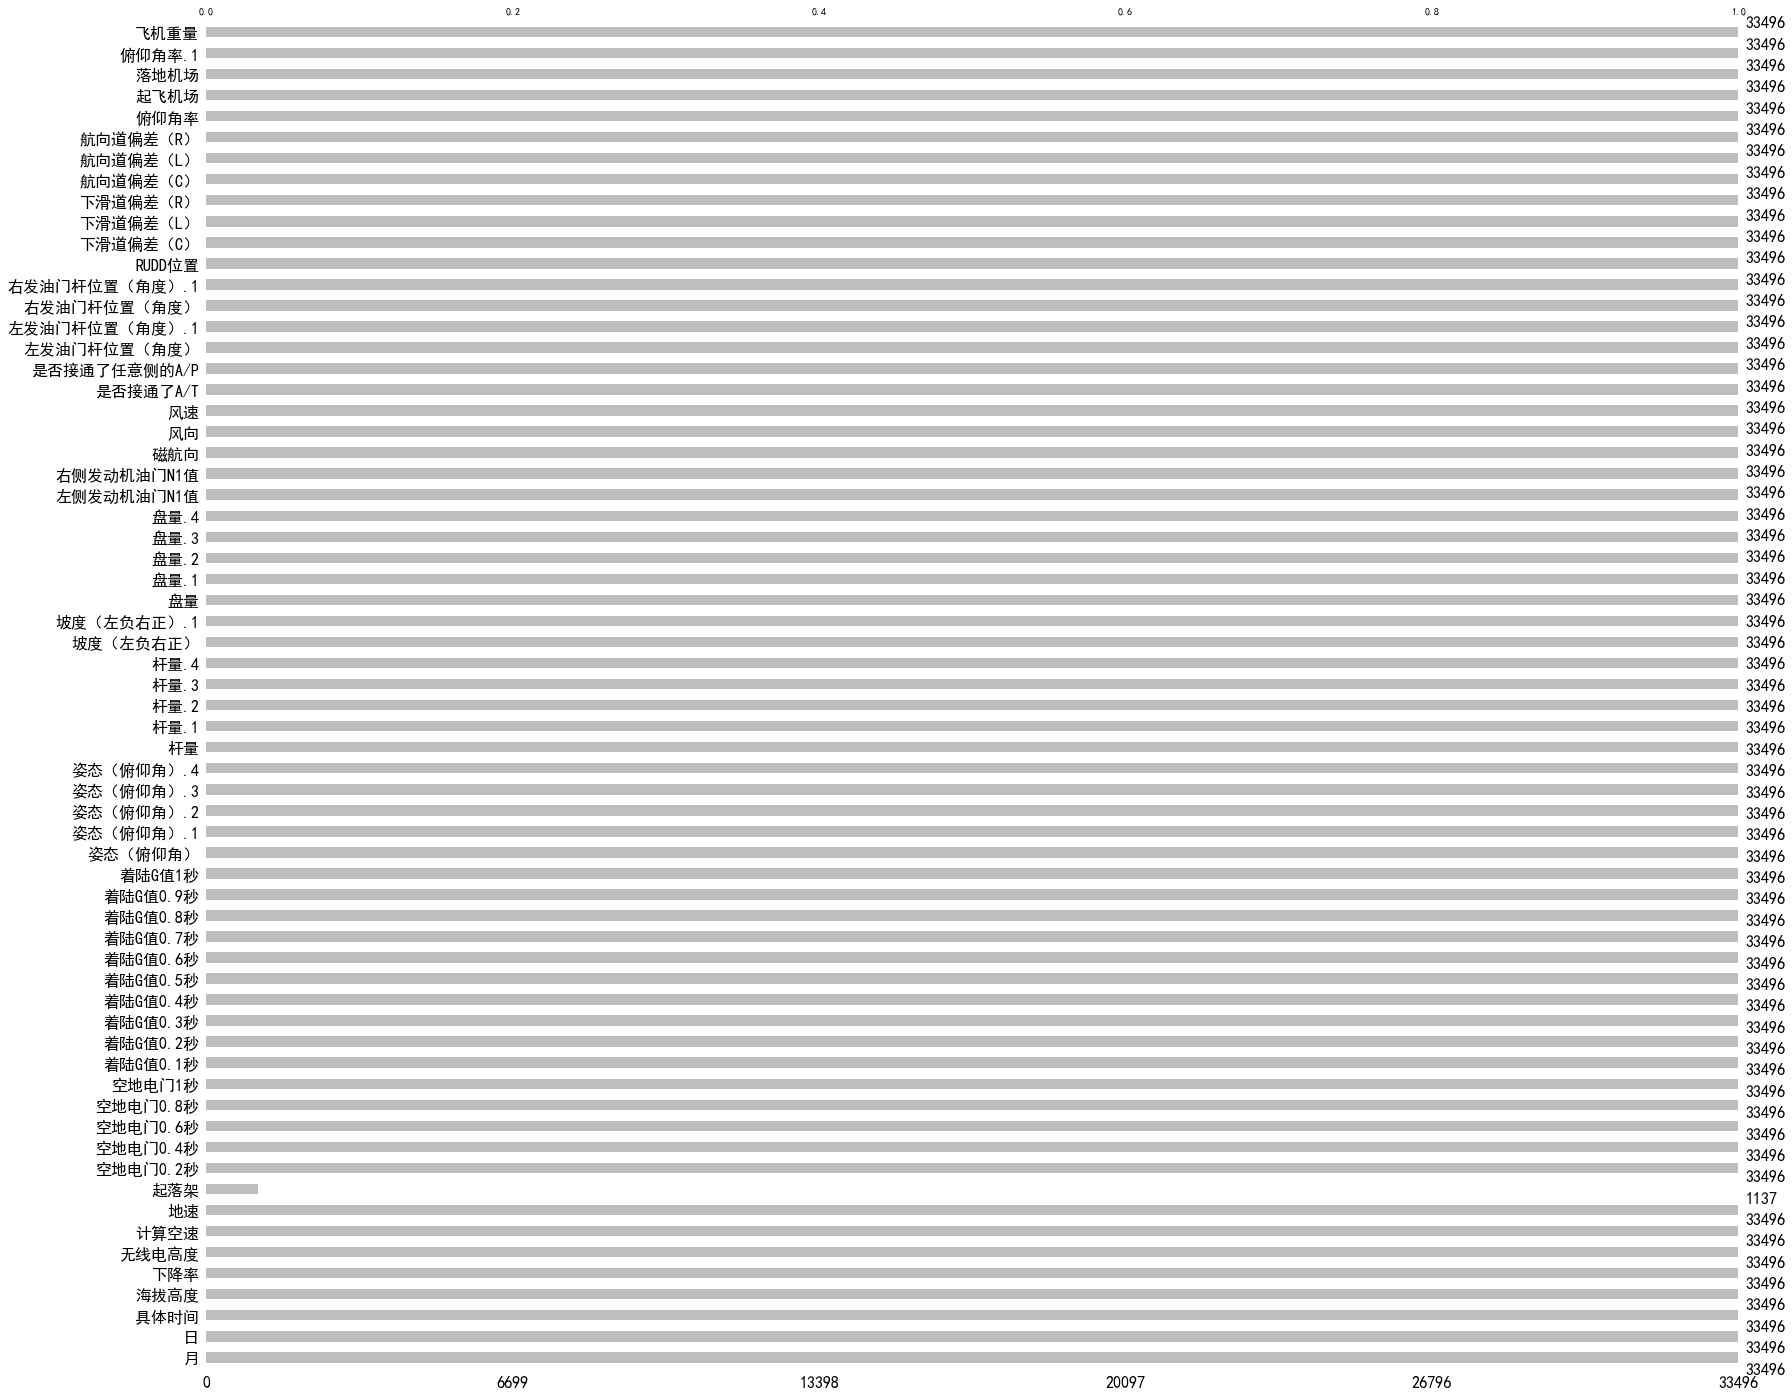

In [4]:
import missingno
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
missingno.bar(data, color=(190/255,190/255,190/255))
plt.tight_layout()

In [5]:
data.replace({"起落架":{'DOWN':1},
              "空地电门0.2秒":{True:1,False:0},
              "空地电门0.4秒":{True:1,False:0},
              "空地电门0.6秒":{True:1,False:0},
              "空地电门0.8秒":{True:1,False:0},
              "空地电门1秒":{True:1,False:0},
              "是否接通了A/T":{'DISENGD':0,'ENGAGED':1},
              "是否接通了任意侧的A/P":{'OFF':0,'ON':1},
              }, inplace=True)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,7,19:17:47,425,-37,-8,30.0,10.75,1.0,0,...,-1.37,-0.30,4.01,3.56,4.20,0.1250,机场117,机场68,0.1250,338560
1,4,7,19:17:48,423,-37,-8,30.0,10.75,1.0,0,...,-0.09,-0.04,3.22,3.37,3.14,-0.0625,机场117,机场68,-0.0625,338560
2,4,7,19:17:49,422,-18,-9,30.0,10.75,1.0,0,...,-0.04,0.62,3.95,3.70,4.02,-0.1250,机场117,机场68,-0.1250,338560
3,4,7,19:17:50,422,3,-9,30.0,10.75,1.0,0,...,-0.37,-0.15,3.42,2.42,3.41,-0.0625,机场117,机场68,-0.0625,338560
4,4,7,19:17:51,423,8,-9,30.0,10.75,1.0,0,...,-1.15,0.01,3.60,3.62,3.54,0.0625,机场117,机场68,0.0625,338560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33491,4,8,4:36: 8,106,-2,-8,30.0,0.50,1.0,0,...,3.54,2.03,4.06,0.91,4.14,0.0000,机场117,机场68,0.0000,259680
33492,4,8,4:36: 9,106,-4,-8,30.0,0.50,1.0,0,...,3.58,2.00,4.11,0.94,4.18,-0.0625,机场117,机场68,-0.0625,259680
33493,4,8,4:36:10,106,-4,-8,30.0,0.50,1.0,0,...,3.45,2.20,4.10,0.98,4.18,0.0000,机场117,机场68,0.0000,259680
33494,4,8,4:36:11,106,-3,-8,30.0,0.50,1.0,0,...,3.69,1.96,4.01,1.06,4.07,0.0000,机场117,机场68,0.0000,259680


In [6]:
data=data.fillna(0)
data

,月,日,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,起飞机场,落地机场,俯仰角率.1,飞机重量
0,4,7,19:17:47,425,-37,-8,30.0,10.75,1.0,0,...,-1.37,-0.30,4.01,3.56,4.20,0.1250,机场117,机场68,0.1250,338560
1,4,7,19:17:48,423,-37,-8,30.0,10.75,1.0,0,...,-0.09,-0.04,3.22,3.37,3.14,-0.0625,机场117,机场68,-0.0625,338560
2,4,7,19:17:49,422,-18,-9,30.0,10.75,1.0,0,...,-0.04,0.62,3.95,3.70,4.02,-0.1250,机场117,机场68,-0.1250,338560
3,4,7,19:17:50,422,3,-9,30.0,10.75,1.0,0,...,-0.37,-0.15,3.42,2.42,3.41,-0.0625,机场117,机场68,-0.0625,338560
4,4,7,19:17:51,423,8,-9,30.0,10.75,1.0,0,...,-1.15,0.01,3.60,3.62,3.54,0.0625,机场117,机场68,0.0625,338560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33491,4,8,4:36: 8,106,-2,-8,30.0,0.50,1.0,0,...,3.54,2.03,4.06,0.91,4.14,0.0000,机场117,机场68,0.0000,259680
33492,4,8,4:36: 9,106,-4,-8,30.0,0.50,1.0,0,...,3.58,2.00,4.11,0.94,4.18,-0.0625,机场117,机场68,-0.0625,259680
33493,4,8,4:36:10,106,-4,-8,30.0,0.50,1.0,0,...,3.45,2.20,4.10,0.98,4.18,0.0000,机场117,机场68,0.0000,259680
33494,4,8,4:36:11,106,-3,-8,30.0,0.50,1.0,0,...,3.69,1.96,4.01,1.06,4.07,0.0000,机场117,机场68,0.0000,259680


In [7]:
data.drop(labels=['月','日','起飞机场','落地机场','飞机重量'],axis=1,inplace=True)
data

,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,19:17:47,425,-37,-8,30.0,10.75,1.0,0,0,0,...,34.5850,-0.2539,-1.52,-1.37,-0.30,4.01,3.56,4.20,0.1250,0.1250
1,19:17:48,423,-37,-8,30.0,10.75,1.0,0,0,0,...,34.5850,-0.2539,-0.15,-0.09,-0.04,3.22,3.37,3.14,-0.0625,-0.0625
2,19:17:49,422,-18,-9,30.0,10.75,1.0,0,0,0,...,34.5850,-0.2539,0.00,-0.04,0.62,3.95,3.70,4.02,-0.1250,-0.1250
3,19:17:50,422,3,-9,30.0,10.75,1.0,0,0,0,...,34.5850,-0.2539,0.06,-0.37,-0.15,3.42,2.42,3.41,-0.0625,-0.0625
4,19:17:51,423,8,-9,30.0,10.75,1.0,0,0,0,...,34.5850,-0.2539,-1.17,-1.15,0.01,3.60,3.62,3.54,0.0625,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33491,4:36: 8,106,-2,-8,30.0,0.50,1.0,0,0,0,...,34.1016,-0.2480,3.68,3.54,2.03,4.06,0.91,4.14,0.0000,0.0000
33492,4:36: 9,106,-4,-8,30.0,0.50,1.0,0,0,0,...,34.1016,-0.2480,3.53,3.58,2.00,4.11,0.94,4.18,-0.0625,-0.0625
33493,4:36:10,106,-4,-8,30.0,0.50,1.0,0,0,0,...,34.1016,-0.2539,3.50,3.45,2.20,4.10,0.98,4.18,0.0000,0.0000
33494,4:36:11,106,-3,-8,30.0,0.50,1.0,0,0,0,...,34.1016,-0.2539,3.59,3.69,1.96,4.01,1.06,4.07,0.0000,0.0000


# QAR异常判断，剔除

In [8]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup', dup_row)
data[data['is_dup'] == True]

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
2037,True,19:51:45,31006,-61,1404,311.375,548.25,0.0,1,1,...,58.6670,-0.2715,0.08,-0.09,0.06,-4.76,-4.67,-4.67,0.0625,0.0625
2038,True,19:51:45,31000,8,1404,311.625,548.25,0.0,1,1,...,58.6670,-0.2715,-0.21,-0.25,-0.13,-4.72,-4.88,-4.92,-0.0625,-0.0625
5258,True,20:45:27,32998,31,1404,298.125,514.25,0.0,1,1,...,59.7656,-0.2617,-0.08,-0.09,-0.03,0.05,-0.11,-0.18,-0.0625,-0.0625
5259,True,20:45:27,33000,16,1404,298.125,514.25,0.0,1,1,...,59.7656,-0.2617,-0.06,0.04,-0.04,0.02,-0.03,-0.10,-0.0625,-0.0625
8505,True,21:39:35,32999,-1,1404,298.250,514.00,0.0,1,1,...,59.2383,-0.2598,-0.04,-0.11,0.07,0.07,0.11,-0.12,0.0000,0.0000
8506,True,21:39:35,32998,17,1404,298.250,514.00,0.0,1,1,...,59.2383,-0.2598,-0.07,-0.01,-0.10,-0.03,-0.03,-0.13,0.0000,0.0000
11753,True,22:33:44,32999,-7,1404,297.375,521.00,0.0,1,1,...,58.9307,-0.2617,-0.14,0.05,0.05,0.00,-0.10,-0.08,-0.0625,-0.0625
11754,True,22:33:44,32999,11,1404,297.250,521.00,0.0,1,1,...,58.9746,-0.2617,-0.19,-0.20,-0.05,-0.02,0.04,0.10,0.0000,0.0000
14997,True,23:27:49,33002,11,1404,300.250,557.50,0.0,1,1,...,58.6670,-0.2637,-0.06,-0.04,-0.08,-0.01,-0.06,0.02,-0.0625,-0.0625
14998,True,23:27:49,33002,0,1404,300.250,557.50,0.0,1,1,...,58.6670,-0.2637,-0.08,-0.06,-0.05,-0.16,0.06,0.03,-0.0625,-0.0625


In [9]:
data=data.drop_duplicates(subset=['具体时间'],keep='first')
data

,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1
0,False,19:17:47,425,-37,-8,30.0,10.75,1.0,0,0,...,34.5850,-0.2539,-1.52,-1.37,-0.30,4.01,3.56,4.20,0.1250,0.1250
1,False,19:17:48,423,-37,-8,30.0,10.75,1.0,0,0,...,34.5850,-0.2539,-0.15,-0.09,-0.04,3.22,3.37,3.14,-0.0625,-0.0625
2,False,19:17:49,422,-18,-9,30.0,10.75,1.0,0,0,...,34.5850,-0.2539,0.00,-0.04,0.62,3.95,3.70,4.02,-0.1250,-0.1250
3,False,19:17:50,422,3,-9,30.0,10.75,1.0,0,0,...,34.5850,-0.2539,0.06,-0.37,-0.15,3.42,2.42,3.41,-0.0625,-0.0625
4,False,19:17:51,423,8,-9,30.0,10.75,1.0,0,0,...,34.5850,-0.2539,-1.17,-1.15,0.01,3.60,3.62,3.54,0.0625,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33491,False,4:36: 8,106,-2,-8,30.0,0.50,1.0,0,0,...,34.1016,-0.2480,3.68,3.54,2.03,4.06,0.91,4.14,0.0000,0.0000
33492,False,4:36: 9,106,-4,-8,30.0,0.50,1.0,0,0,...,34.1016,-0.2480,3.53,3.58,2.00,4.11,0.94,4.18,-0.0625,-0.0625
33493,False,4:36:10,106,-4,-8,30.0,0.50,1.0,0,0,...,34.1016,-0.2539,3.50,3.45,2.20,4.10,0.98,4.18,0.0000,0.0000
33494,False,4:36:11,106,-3,-8,30.0,0.50,1.0,0,0,...,34.1016,-0.2539,3.59,3.69,1.96,4.01,1.06,4.07,0.0000,0.0000


In [10]:
dup_row = data.duplicated(subset=['具体时间'], keep=False)
data.insert(0, 'is_dup_N', dup_row)
data[data['is_dup_N'] == True]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1


In [11]:
def function(a, b):
    if a == b:
        return 1
    else:
        return 0


data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)
data

D:\TempS\ipykernel_22744\3231745931.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bool'] = data.apply(lambda x : function(x['俯仰角率'],x['俯仰角率.1']),axis = 1)


,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool
0,False,False,19:17:47,425,-37,-8,30.0,10.75,1.0,0,...,-0.2539,-1.52,-1.37,-0.30,4.01,3.56,4.20,0.1250,0.1250,1
1,False,False,19:17:48,423,-37,-8,30.0,10.75,1.0,0,...,-0.2539,-0.15,-0.09,-0.04,3.22,3.37,3.14,-0.0625,-0.0625,1
2,False,False,19:17:49,422,-18,-9,30.0,10.75,1.0,0,...,-0.2539,0.00,-0.04,0.62,3.95,3.70,4.02,-0.1250,-0.1250,1
3,False,False,19:17:50,422,3,-9,30.0,10.75,1.0,0,...,-0.2539,0.06,-0.37,-0.15,3.42,2.42,3.41,-0.0625,-0.0625,1
4,False,False,19:17:51,423,8,-9,30.0,10.75,1.0,0,...,-0.2539,-1.17,-1.15,0.01,3.60,3.62,3.54,0.0625,0.0625,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33491,False,False,4:36: 8,106,-2,-8,30.0,0.50,1.0,0,...,-0.2480,3.68,3.54,2.03,4.06,0.91,4.14,0.0000,0.0000,1
33492,False,False,4:36: 9,106,-4,-8,30.0,0.50,1.0,0,...,-0.2480,3.53,3.58,2.00,4.11,0.94,4.18,-0.0625,-0.0625,1
33493,False,False,4:36:10,106,-4,-8,30.0,0.50,1.0,0,...,-0.2539,3.50,3.45,2.20,4.10,0.98,4.18,0.0000,0.0000,1
33494,False,False,4:36:11,106,-3,-8,30.0,0.50,1.0,0,...,-0.2539,3.59,3.69,1.96,4.01,1.06,4.07,0.0000,0.0000,1


In [12]:
data[data['bool']==0]

,is_dup_N,is_dup,具体时间,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,...,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率,俯仰角率.1,bool


In [13]:
data=data.drop(labels=['is_dup','is_dup_N','bool','具体时间','俯仰角率.1'],axis=1)
data

,海拔高度,下降率,无线电高度,计算空速,地速,起落架,空地电门0.2秒,空地电门0.4秒,空地电门0.6秒,空地电门0.8秒,...,右发油门杆位置（角度）,右发油门杆位置（角度）.1,RUDD位置,下滑道偏差（C）,下滑道偏差（L）,下滑道偏差（R）,航向道偏差（C）,航向道偏差（L）,航向道偏差（R）,俯仰角率
0,425,-37,-8,30.0,10.75,1.0,0,0,0,0,...,34.5850,34.5850,-0.2539,-1.52,-1.37,-0.30,4.01,3.56,4.20,0.1250
1,423,-37,-8,30.0,10.75,1.0,0,0,0,0,...,34.5850,34.5850,-0.2539,-0.15,-0.09,-0.04,3.22,3.37,3.14,-0.0625
2,422,-18,-9,30.0,10.75,1.0,0,0,0,0,...,34.5850,34.5850,-0.2539,0.00,-0.04,0.62,3.95,3.70,4.02,-0.1250
3,422,3,-9,30.0,10.75,1.0,0,0,0,0,...,34.5850,34.5850,-0.2539,0.06,-0.37,-0.15,3.42,2.42,3.41,-0.0625
4,423,8,-9,30.0,10.75,1.0,0,0,0,0,...,34.5850,34.5850,-0.2539,-1.17,-1.15,0.01,3.60,3.62,3.54,0.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33491,106,-2,-8,30.0,0.50,1.0,0,0,0,0,...,34.1016,34.1016,-0.2480,3.68,3.54,2.03,4.06,0.91,4.14,0.0000
33492,106,-4,-8,30.0,0.50,1.0,0,0,0,0,...,34.1016,34.1016,-0.2480,3.53,3.58,2.00,4.11,0.94,4.18,-0.0625
33493,106,-4,-8,30.0,0.50,1.0,0,0,0,0,...,34.1016,34.1016,-0.2539,3.50,3.45,2.20,4.10,0.98,4.18,0.0000
33494,106,-3,-8,30.0,0.50,1.0,0,0,0,0,...,34.1016,34.1016,-0.2539,3.59,3.69,1.96,4.01,1.06,4.07,0.0000
